# Titanic survival dataset exploration and classification

Sources:
- https://www.kaggle.com/alexisbcook/titanic-tutorial/data
- https://www.kaggle.com/wuhao1996/titanic
- https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025030B83208>,
      dtype=object)

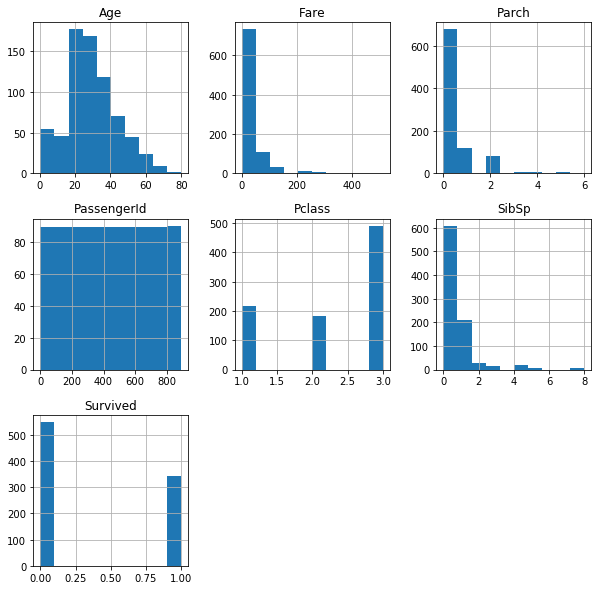

In [4]:
train_data.hist(bins = 10, figsize = (10,10))

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def get_models():
    models=[]
    models.append(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=1))
    models.append(LogisticRegression())
    models.append(svm.SVC())
    models.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
    models.append(BaggingClassifier())
    models.append(GaussianNB())
    models.append(XGBClassifier())
    models.append(KNeighborsClassifier(3))
    models.append(DecisionTreeClassifier())
    models.append(AdaBoostClassifier())
    models.append(LinearDiscriminantAnalysis())
    return models

{'RandomForestClassifier': 0.7999999999999999, 'LogisticRegression': 0.7977777777777777, 'SVC': 0.7977777777777777, 'GradientBoostingClassifier': 0.7844444444444444, 'BaggingClassifier': 0.7744444444444444, 'GaussianNB': 0.791111111111111, 'XGBClassifier': 0.7722222222222221, 'KNeighborsClassifier': 0.7466666666666667, 'DecisionTreeClassifier': 0.7699999999999999, 'AdaBoostClassifier': 0.7822222222222222, 'LinearDiscriminantAnalysis': 0.7899999999999998}


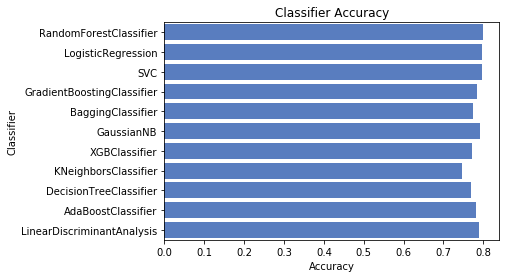

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits=10

# Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)

features = ["Pclass", "Sex", "SibSp", "Parch"]

X_train_full = pd.get_dummies(train_data[features]).values
y_train_full = train_data["Survived"].values

acc_dict = {}

for train_index, test_index in sss.split(X_train_full, y_train_full):       
    X_train, X_test = X_train_full[train_index], X_train_full[test_index]
    y_train, y_test = y_train_full[train_index], y_train_full[test_index]

    models = get_models()
    
    for model in models:
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        name = model.__class__.__name__
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / float(n_splits)
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

print (acc_dict)

In [12]:
X_test = pd.get_dummies(test_data[features]).values

# Use one of the best classifiers
selected_model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=1)
selected_model.fit(X_train_full, y_train_full)
y_pred = selected_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
out_file = 'titanic/my_submission.csv'
output.to_csv(out_file, index=False)

print ('Submission saved:', out_file)

submitted_data = pd.read_csv(out_file)
submitted_data.head()

Submission saved: titanic/my_submission.csv


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
